# DCSI 100 Group Project

## By Alec Jessen, Avery Swoboda, Daniel Wick, Naya Bhatthal 


# Title: An Investigation into the Factors that Help Set up a Top Tennis Player for Success

## Introduction:

Tennis is a racquet sport played between one another or teams of 2 opposing each other. Within the sport, a ranking system represents how good a player is based on their performance and form. For example, the ATP rankings system collects points for a tennis player from events over 52 weeks (within this ranking system, there is a grand slam component). Four fall within the 52-week time frame and are considered the highest-graded tournaments in the ATP calendar (Nag. U, 2022). In regards to prize money, it's found that the majority of prize money is attained by a very small number of the highest-ranked players. This system prevents new talented tennis players from having the ability to make a living from the sport while only a small group of individuals are making the most money. We investigated to see how variables such as age and rank (measured by both current rank and best rank) have a relationship with prize money earned by each player, as a measure of success in terms of being able to support their livelihood playing this sport. 

This led to the research question...

### Question: “How do variables such as age, and rank (both current rank and best rank) correlate with a tennis player’s success level, as measured by prize money earned?”

The dataset analyzed to answer the above question was “Player Stats for Top 500 Players” from ultimate tennis statistics.com. It is a detailed dataset that contains information about the name, age, country of origin, playing style (right-handed or left-handed), backhand (one-handed or two-handed), current and best ranking, current, best and peak elo rating, prize money earned for the top 500 tennis players worldwide, among other variables about their professional life about resources of information acquisition.

## Methods
### Data Wrangling and Exploratory Data Analysis

To begin, we loaded the necessary libraries to conduct our data analysis and installed a few packages pertaining to functions not as commonly used in the classroom. 

When running this code please ensure to run the three uncommented install statements marked below as they are needed for the following code:
The janitor package contains key functions for cleaning and analyzing data, such as "clean_names." GGally provides various methods for visualizing  relationships, such as pairwise plots via the function "ggpairs."The ISLR (Introduction to Statistical Learning with Applications in R) also includes functions used in the textbook that we will employ. 

In [18]:
#install.packages("rlang")
#install.packages("readr")
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("tidyverse")
#install.packages("rvest")
#install.packages("tidymodels")

# Please install the following 3 packages 
install.packages("janitor")
install.packages("GGally")
install.packages("ISLR")

library(rlang)
library(dplyr)
library(tidyverse)
library(tidymodels)
library(janitor)
library(rsample)
library(ggplot2)
library(repr)
library(GGally)
library(ISLR)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



First, we downloaded the tennis dataset from the indicated website and saved it locally as "player_stats.csv." As the data set is separated by semicolons, we then used the "read_csv" function to read the file into a data frame named "tennis_data". The "clean_names" function was used to standardize the column names to only include lowercase letters and underscores rather than spaces. We then selected the subset of columns relevant to our investigation. The "na.omit" function was used to delete rows with missing values.

To create the new tidy dataset named "tennis_data_tidy", we transformed the "age," "current_rank," and "best_rank" columns from character (chr) to numeric (dbl) forms. We used additional expressions to extract the numeric values from the "prize_money" column in particular, as it contained extra characters describing the rank and special statuses of the players. We also used the "mutate" function to create additional variables, such as "current_rank_rev" and "best_rank_rev", so that higher values indicate a higher ranking during the interpretation of the variables. To do this, the original ranks were subtracted from 501, the total number of ranks in the dataset plus one so that the rank one player would be at 500 instead of 499. After doing preliminary research (as seen later on in the methods section), we noted that prize money may contain a non-linear distribution of funds by rank with a large proportion of funds being given to the top-performing players, so we established a variable called "log_prize_money," which denotes the base-10 logarithm of "prize_money." We then used the "head" function to display a preview of our tidy dataset.

In [70]:
# Download the tennis data file from the web into a local .csv file, then tidy the data specific for our analysis

# Make sure this "#" below is removed before submission  !!!!!   (leave for testing for now)
#download.file("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS","player_stats.csv")
tennis_data <- read_csv("player_stats.csv", show_col_types = FALSE)

tennis_data_tidy <- tennis_data |> 
    select(-Wikipedia) |> 
    clean_names() |>
    select(x1, age, current_rank, best_rank, prize_money) |>
    na.omit()

tennis_data_tidy <- tennis_data_tidy |>
  mutate(
    age = as.numeric(sub(" .*", "", age)),
    current_rank = as.numeric(sub(" .*", "", current_rank)),
    best_rank = as.numeric(sub(" .*", "", best_rank)),
    prize_money = str_extract(prize_money, regex("^[^$]*[$]\\s*[0123456789,]+\\b")),
    prize_money = as.numeric(gsub("[^0-9]", "", prize_money)),
    current_rank_rev = 501 - current_rank,
    best_rank_rev = 501 - best_rank, 
    log_prize_money = log10(prize_money)
  ) |>
    na.omit()

cat("\n Figure 1a: Tidy extracted tennis player data, modified for data analysis (only top 6 rows shown)") 
head(tennis_data_tidy)

New names:
• `` -> `...1`



 Figure 1a: Tidy extracted tennis player data, modified for data analysis (only top 6 rows shown)

x1 age current_rank best_rank prize_money current_rank_rev best_rank_rev
1 1  18  326          316         59040     175              185          
2 2  32  178           44       3261567     323              457          
3 3  21  236          130        374093     265              371          
4 4  27  183           17       6091971     318              484          
5 5  22   31           31       1517157     470              470          
6 6  28  307          213        278709     194              288          
  log_prize_money
1 4.771146       
2 6.513426       
3 5.572980       
4 6.784758       
5 6.181031       
6 5.445151

In [71]:
summary_data <- tennis_data_tidy %>%
  summarize(
    Count = n(),
    mean_age = mean(age),
    mean_prize_money = mean(prize_money),
    max_prize_money = max(prize_money),
    min_prize_money = min(prize_money))

cat("\n Figure 1b: Summarized statistics of main tennis player data") 
summary_data


 Figure 1b: Summarized statistics of main tennis player data

Count mean_age mean_prize_money max_prize_money min_prize_money
1 416   26.42308 3411556          139144944       145

The summary highlights important information, such as the mean age, mean prize money, and prize money range with maximum and minimum values. One can see how there is a vast deviation in the amount of prize money available to gain, between the highest earning and lowest earning players in this data set. While many players do make money from alternative income streams such as sponsorships, it is important to note that this data set theoretically contains the top 500 players by rank, making this disparity even worse if one was to include all tennis playing professionals.

Next, we created an initial pairplot from the data, using age, reversed current rank, reversed best rank, and prize money as variables to compare.

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Computation failed in `stat_bin()`
Caused by error in `bin_breaks_width()`:
! The number of histogram bins must be less than 1,000,000.
ℹ Did you make `binwidth` too small?”


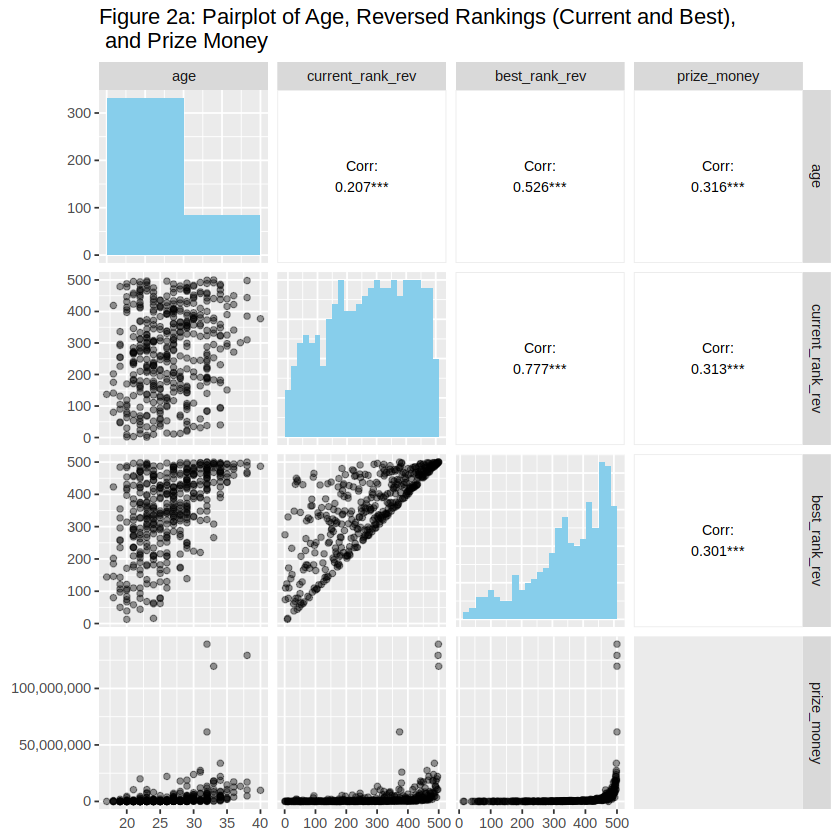

In [72]:
tennis_pairplot <- tennis_data_tidy |> 
    select(age, current_rank_rev, best_rank_rev, prize_money) |>
    ggpairs(lower = list(continuous = wrap('points', 
                                         alpha = 0.4, 
                                         color = "black")),
            diag = list(continuous = wrap('barDiag', binwidth = 20, fill = "skyblue")),
            upper = list(continuous = wrap('cor', size = 3, color = "black"))) +
            theme(text = element_text(size = 11)) +
  scale_y_continuous(labels = scales::comma) +
  ggtitle("Figure 2a: Pairplot of Age, Reversed Rankings (Current and Best), \n and Prize Money")

tennis_pairplot

As we expected, a positive correlation was found between best and current rank and prize money, as indicated by the values being greater than zero and less than one (0.301 and .313, respectively). A positive correlation was also seen between age and prize money (.318), this may be due to increased age corresponding to increased experience and hence acquired success. It is noted that since the bin sizes are so different for age and prize money the diagonal histogram plots for the above graph are not clearly able to all be visualized in this format. We explored these graphs further by visualizing each predictor variable (age, reversed current rank, and reversed best rank) versus prize money with individual scatter plots.


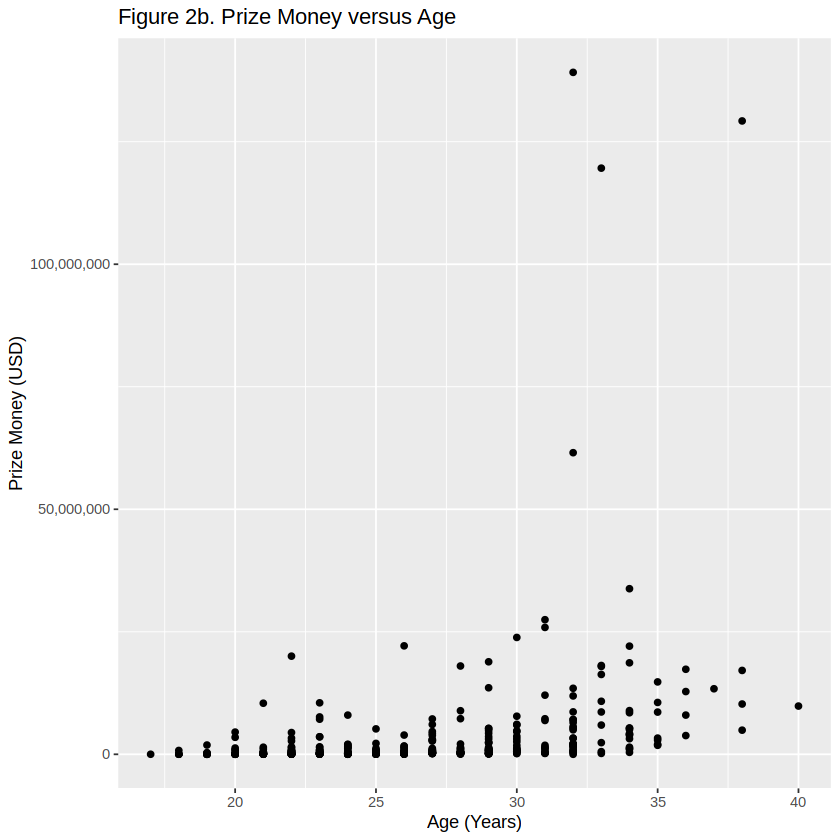

In [73]:
prize_age_plot <- ggplot(tennis_data_tidy, 
                    aes(x= age, y= prize_money)) +
    geom_point() +
    labs(x= "Age (Years)",
         y= "Prize Money (USD)") +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Figure 2b. Prize Money versus Age")

prize_current_rank_plot <- ggplot(tennis_data_tidy, 
                             aes(x= current_rank_rev, y= prize_money)) +
    geom_point() +
    labs(x= "Reversed Current Ranking (higher value is better)",
         y= "Prize Money (USD)") +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Figure 2c. Prize Money versus Reversed Current Rank")

prize_best_rank_plot <- ggplot(tennis_data_tidy, 
                          aes(x= best_rank_rev, y= prize_money)) +
    geom_point() +
    labs(x= "Reversed Best Ranking (higher value is better)",
         y= "Prize Money (USD)") +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Figure 2d. Prize Money versus Reversed Best Rank")
    

prize_age_plot


The plot between age and prize money displayed the expected weak positive linear relationship. 

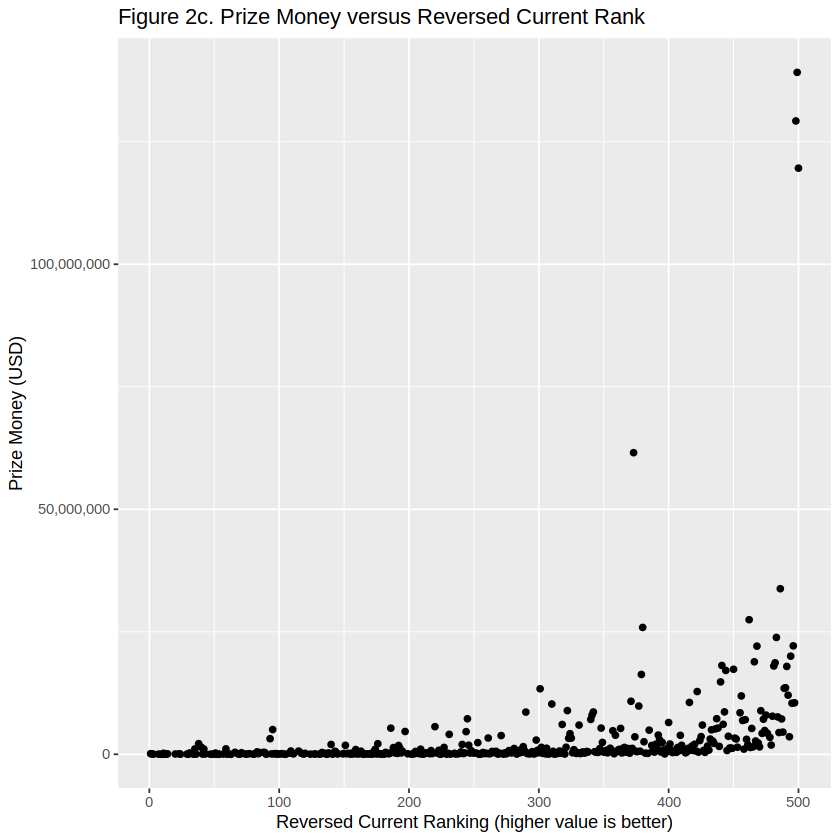

In [74]:
prize_current_rank_plot

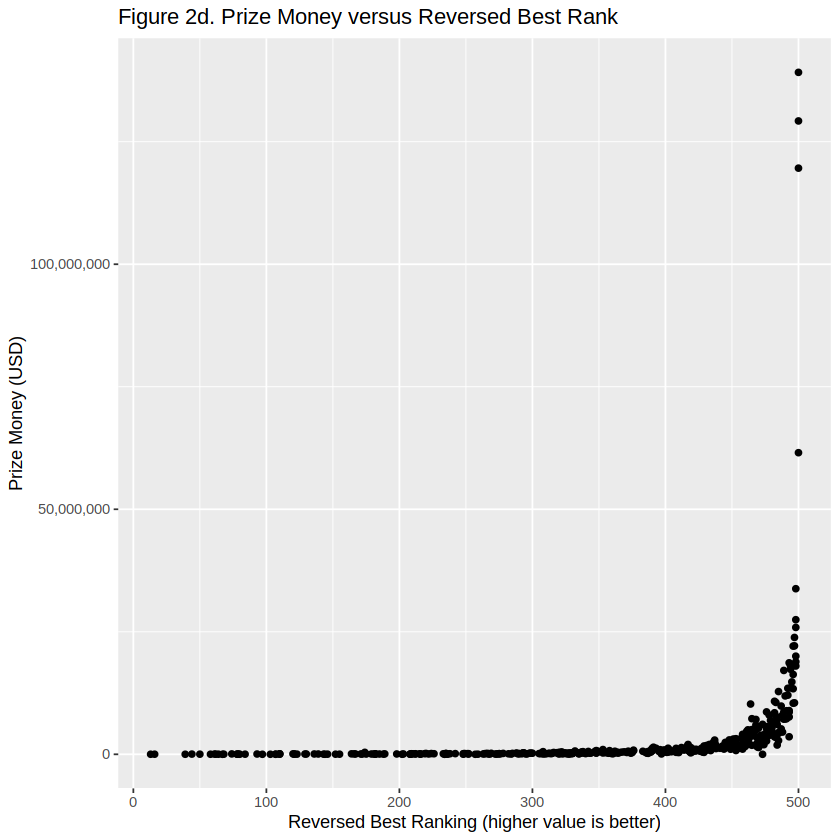

In [75]:
prize_best_rank_plot

The scatter plots between either of the reversed rank variables versus prize money do not appear linear, but instead, prize money seemed to exponentially increase with higher ranking. Hence, from the variance in prize money demonstrated by the min and max values in the summary and these plots, we decided to use the base-10 logarithm of prize money as the response variable in our following data analysis, and created another pairplot from our tidy dataset below. 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


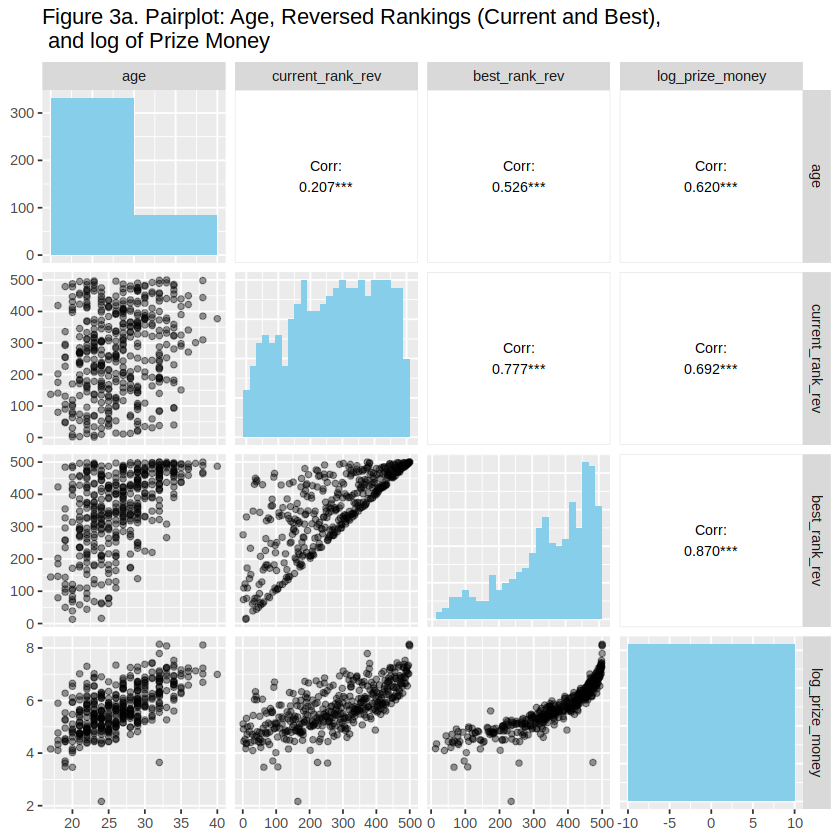

In [76]:
tennis_pairplot_2 <- tennis_data_tidy |> 
    select(age, current_rank_rev, best_rank_rev, log_prize_money) |>
    ggpairs(lower = list(continuous = wrap('points', 
                                         alpha = 0.4, 
                                         color = "black")),
            diag = list(continuous = wrap('barDiag', binwidth = 20, fill = "skyblue")),
            upper = list(continuous = wrap('cor', size = 3, color = "black"))) +
            theme(text = element_text(size = 11)) +
  scale_y_continuous(labels = scales::comma) +
  ggtitle("Figure 3a. Pairplot: Age, Reversed Rankings (Current and Best), \n and log of Prize Money")

tennis_pairplot_2

A stronger positive correlation was found between the best and current rank and the log of prize money (.870 and .692, respectively). A stronger positive correlation was also seen between age and prize money (.620).  This pairplot also better displayed each relationship, and there seemed to be a generally more linear positive relationship between age, current rank, best rank and the log of prize money, by quickly observing the scatter plots (explored further below). 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


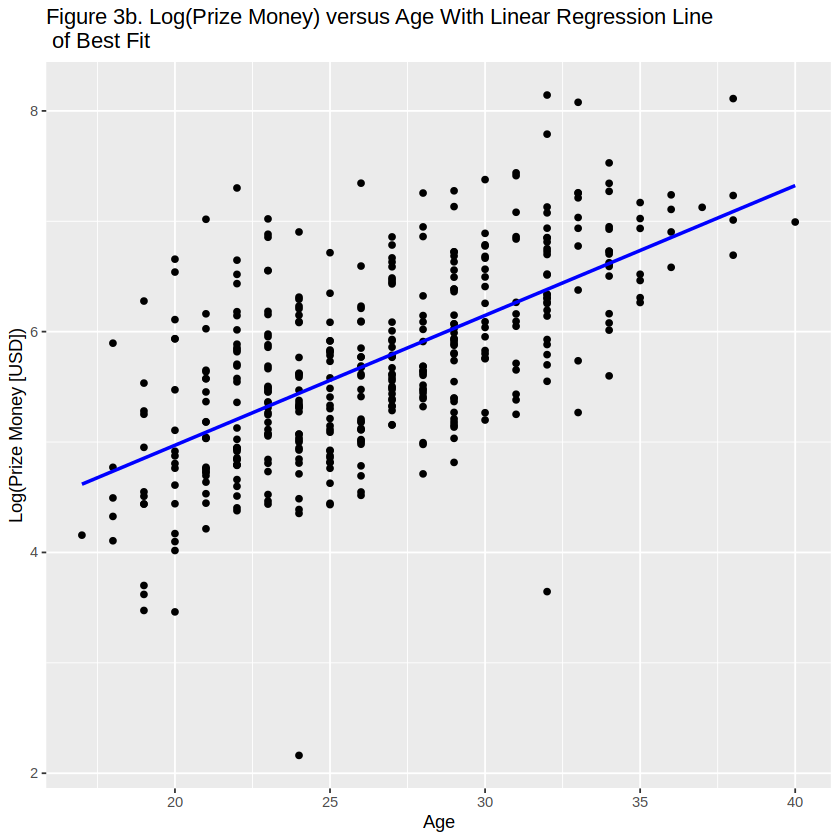

`geom_smooth()` using formula = 'y ~ x'


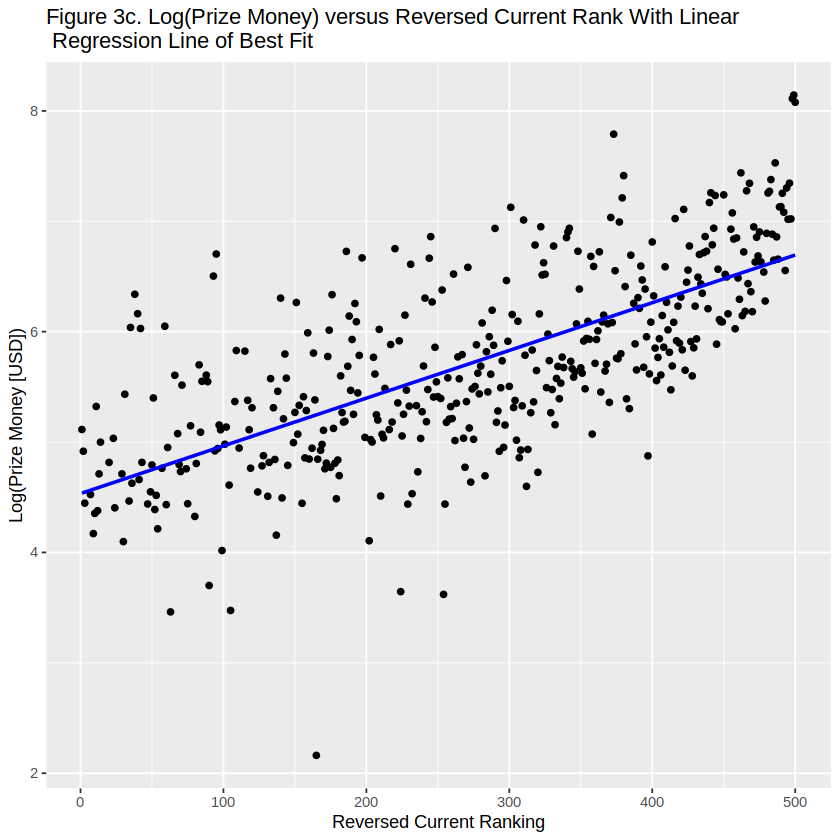

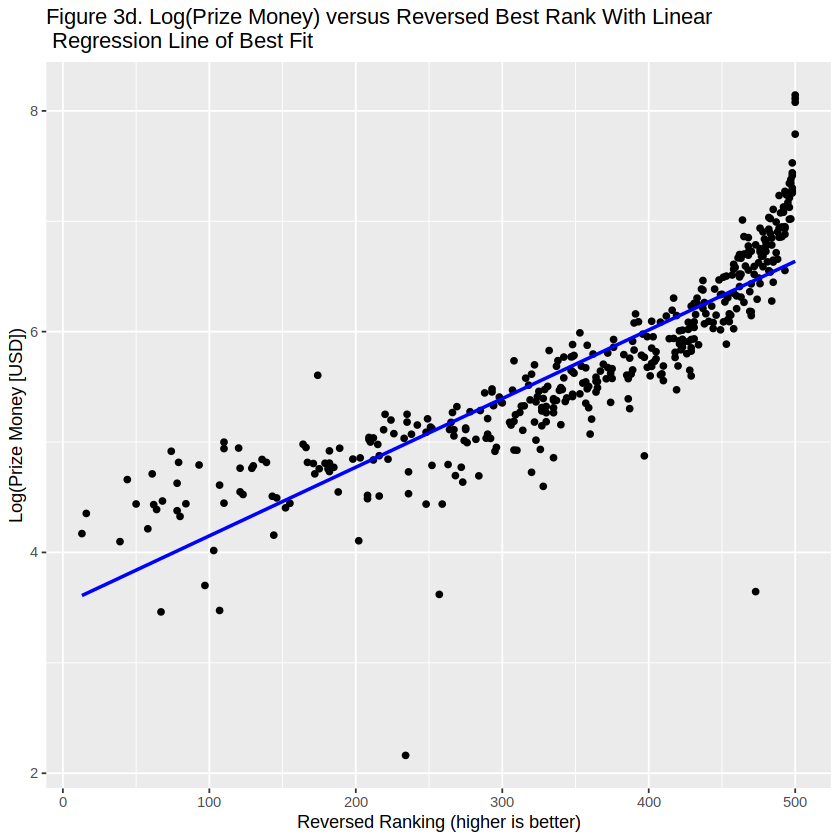

In [77]:
prize_age_line <- ggplot(tennis_data_tidy, 
                         aes(x = age, 
                             y = log_prize_money)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(x = "Age",
         y = "Log(Prize Money [USD])") +
    ggtitle("Figure 3b. Log(Prize Money) versus Age With Linear Regression Line \n of Best Fit")


prize_current_rank_log_line <- ggplot(tennis_data_tidy, 
                                      aes(x = current_rank_rev, 
                                          y = log_prize_money)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add linear regression line
  labs(x = "Reversed Current Ranking",
       y = "Log(Prize Money [USD])") +
  ggtitle("Figure 3c. Log(Prize Money) versus Reversed Current Rank With Linear \n Regression Line of Best Fit")


prize_best_rank_log_line <- ggplot(tennis_data_tidy, 
                                   aes(x = best_rank_rev, 
                                       y = log_prize_money)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add linear regression line
  labs(x = "Reversed Ranking (higher is better)",
       y = "Log(Prize Money [USD])") +
  ggtitle("Figure 3d. Log(Prize Money) versus Reversed Best Rank With Linear \n Regression Line of Best Fit")



prize_age_line
prize_current_rank_log_line
prize_best_rank_log_line

Each variable appears to show a much more linear relationship with the log of prize money, as corroborated by adding a line of best fit using the "geom_smooth" function (only for visualization, analysis provided below). That being said, when a line of best fit is added to figure 3d there is obviously still some exponential shape to the graph which is not fully represented by the linear regression line. Despite this limitation the line still correlates with the data reasonably well and was decided to be accurate enough for the purposes of data analysis. 
We decided to employ best rank, current rank, and age as our predictor variables for our subsequent analysis using linear regression, as they all show a clear correlation with log(prize money). 

### Linear Regression and Analysis
To begin our multivariable linear regression analysis, we divided the tidy dataset into training and testing sets. The "initial_split" function allotted 80%  of the data for training and 20% for testing  ("prop = 0.8"). Setting the option "strata = log_prize_money" ensured that the split was stratified based on our tentative assignment of the response variable as "prize_money" so that values of the variable were proportionally represented in both the training and testing sets.  As the dataset is quite large, we decided to use an 80-20 split, as it still allows a sufficient amount of data for testing, while using a large subset for training to deduce patterns and relationships in the model.

In [78]:
set.seed(123)

tennis_split <- initial_split(tennis_data_tidy, prop = 0.8, strata = log_prize_money)

tennis_split <- initial_split(tennis_data_tidy, prop = 0.8, strata= log_prize_money) 

training_data <- training(tennis_split)
testing_data <- testing(tennis_split)

We used the tidymodels framework to create a linear regression model. The recipe was configured to predict the base-10 log of prize money using the reversed rankings of current and best rank. The fitted model and details were printed to derive the resulting equation.

Log(Prize Money) = 2.568770 + 0.053658 * Age + 0.001293 * Reversed Current Rank + 0.003944 * Reversed Best Rank

It predicts the response variable log(Prize Money) from age, reversed current rank and reversed best rank. 

In [79]:
set.seed(421)

lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Create a recipe for the model
tennis_recipe <- recipe(log_prize_money ~ age + current_rank_rev + best_rank_rev, 
                        data = training_data)

tennis_fit <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(lm_spec) |>
  fit(data = training_data)

# Print the fitted model
tennis_fit

# Print the linear regression specification
print(lm_spec)

# Print the recipe
print(tennis_recipe)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)               age  current_rank_rev     best_rank_rev  
        2.568770          0.053658          0.001293          0.003944  


Linear Regression Model Specification (regression)

Computational engine: lm 

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3


To determine the accuracy of this prediction model, we computed the RMSE (root mean squared error) of the model as seen below. 

In [80]:
set.seed(421)

lm_rmse <- tennis_fit |>
    predict(testing_data) |>
    bind_cols(testing_data) |>
    metrics(truth = log_prize_money, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()
cat("\n Multivaiable analysis rmse = ", lm_rmse, "\n")


 Multivaiable analysis rmse =  0.4155263 


RMSE is the root mean squared error which means that it is average the distance from the prediction to the actual data. It can be a hard metric to compare directly to the data due to the nature of this fairly simple statistic and the fact that the RMSE and also relevant plot data is visualized using the log of prize money. That being said, intuitively if one compares the RMSE as approximately being 0.4 on the above graphs one can see that 0.4 covers a relatively small portion of the data spread for log prize money which means that our prediction is reasonably accurate and fits the data. If the value was very large, spanning a larger proportion of the data that would mean that our regression model has a higher degree of error and is not a good approximation of the trend of the data. 

Unfortunately because we are using multivariable linear regression analysis for this, it is impossible to visualize this against all of the variables at one so instead below there are multiple individual analysis of each predictor variable with the log of prize money, summarized at the bottom of this section. 


 RMSE value of  0.6589067

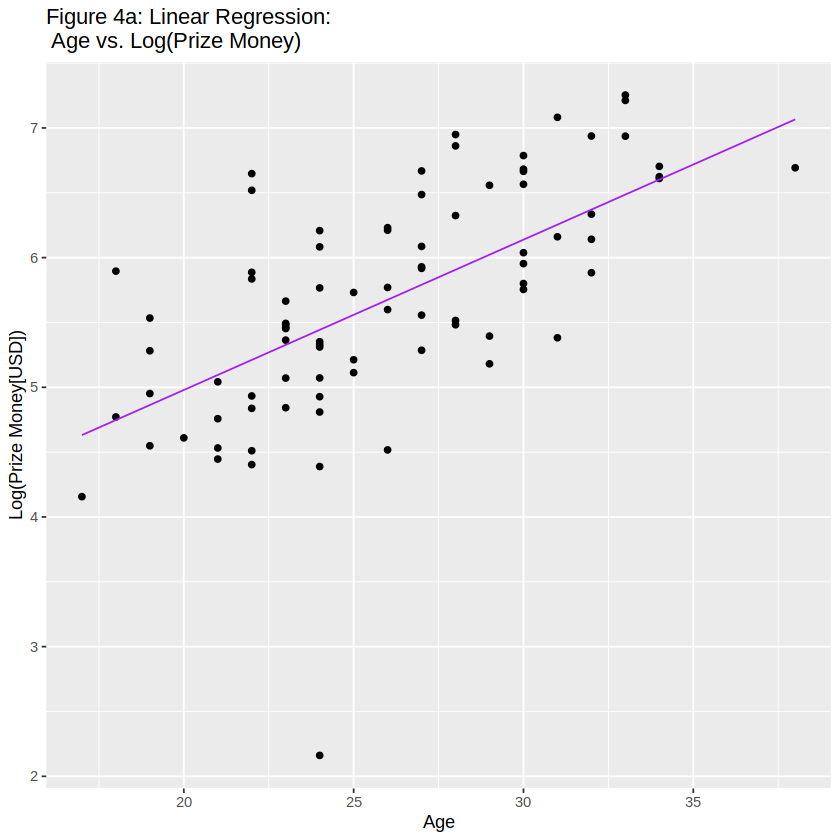

In [81]:
tennis_recipe_2 <- recipe(log_prize_money ~ age, 
                        data = training_data)

tennis_fit_2 <- workflow() |>
  add_recipe(tennis_recipe_2) |>
  add_model(lm_spec) |>
  fit(data = training_data)

tennis_preds_2 <- tennis_fit_2 |>
  predict(testing_data) |>
  bind_cols(testing_data)


ggplot(tennis_preds_2, aes(x = age, y = log_prize_money)) +
  geom_point() + 
  geom_line(aes(x = age, y = .pred), color = "purple") +  
  labs(title = "Figure 4a: Linear Regression: \n Age vs. Log(Prize Money)",
       x = "Age",
       y = "Log(Prize Money[USD])")

lm_rmse_2 <- tennis_preds_2 |>
    metrics(truth = log_prize_money, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

cat("\n RMSE value of ", lm_rmse_2) 


This graph shows the relationship betwen prize money and age where they y-axis is logerithmic. Since we cannot show a multivariable plot we have chosen to displace 3 separate graphs of prize money against age, prize money against current rank, and prize money against best rank. The y-axis of all these plots is a logerithmic scale to allow our linear regression model to work. 


 RMSE value of  0.6848332

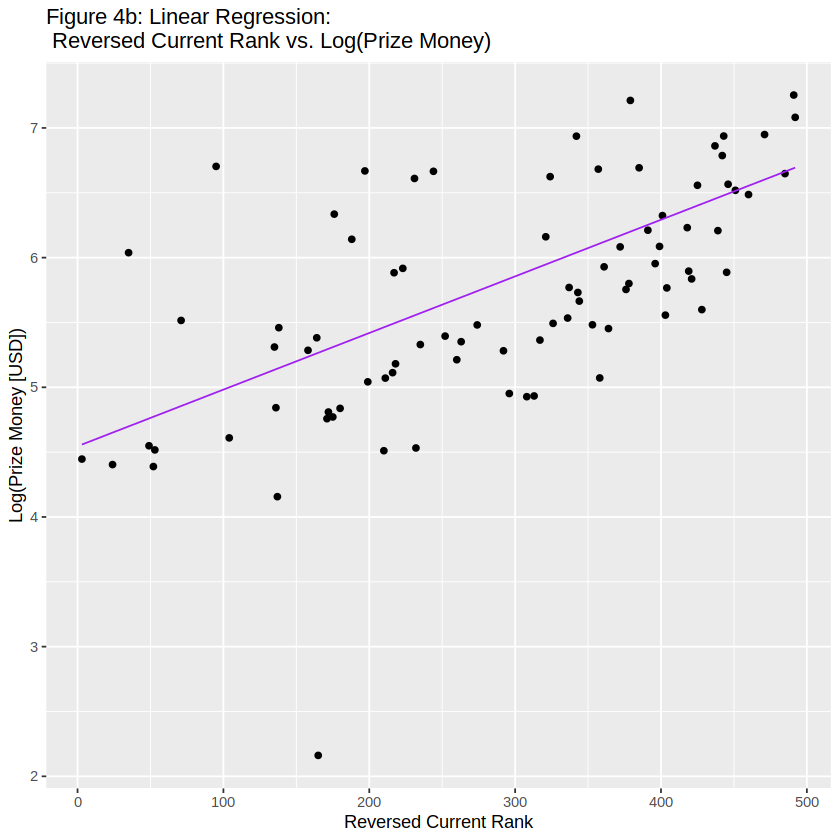

In [82]:
tennis_recipe_3 <- recipe(log_prize_money ~ current_rank_rev, 
                        data = training_data)

tennis_fit_3 <- workflow() |>
  add_recipe(tennis_recipe_3) |>
  add_model(lm_spec) |>
  fit(data = training_data)

tennis_preds_3 <- tennis_fit_3 |>
  predict(testing_data) |>
  bind_cols(testing_data)

ggplot(tennis_preds_3, aes(x = current_rank_rev, y = log_prize_money)) +
  geom_point() + 
  geom_line(aes(x = current_rank_rev, y = .pred), color = "purple") +  # Corrected data argument
  labs(title = "Figure 4b: Linear Regression: \n Reversed Current Rank vs. Log(Prize Money)",
       x = "Reversed Current Rank",
       y = "Log(Prize Money [USD])")

lm_rmse_3 <- tennis_preds_3 |>
    metrics(truth = log_prize_money, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()
cat("\n RMSE value of ", lm_rmse_3) 


 RMSE value of  0.4331865

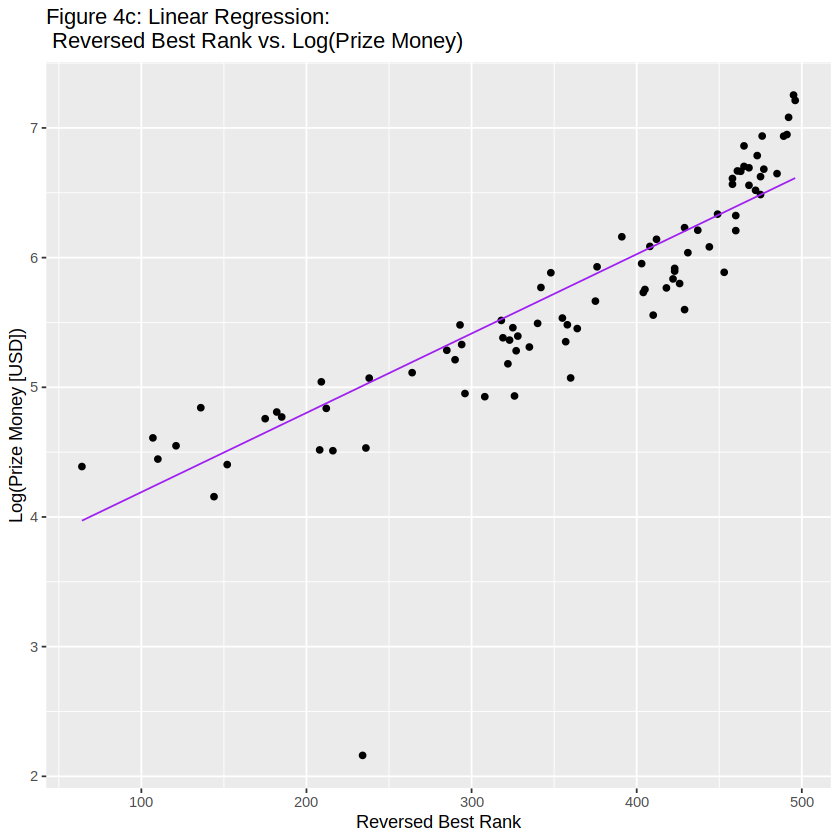

In [83]:
tennis_recipe_4 <- recipe(log_prize_money ~ best_rank_rev, 
                        data = training_data)

tennis_fit_4 <- workflow() |>
  add_recipe(tennis_recipe_4) |>
  add_model(lm_spec) |>
  fit(data = training_data)

tennis_preds_4 <- tennis_fit_4 |>
  predict(testing_data) |>
  bind_cols(testing_data)

ggplot(tennis_preds_4, aes(x = best_rank_rev, y = log_prize_money)) +
  geom_point() + 
  geom_line(aes(x = best_rank_rev, y = .pred), color = "purple") +  
  labs(title = "Figure 4c: Linear Regression: \n Reversed Best Rank vs. Log(Prize Money)",
       x = "Reversed Best Rank",
       y = "Log(Prize Money [USD])")

lm_rmse_4 <- tennis_preds_4 |>
    metrics(truth = log_prize_money, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()
cat("\n RMSE value of ", lm_rmse_4) 

In [84]:
cat("\n Figure 5: Table summarizing RMSE of figures 4a, 4b, and 4c \n as well as the multivariable analysis")
tibble("Category Versus log Prize Money" = c("Age", "Current Rank Reversed", "Best Rank Reversed", "Multivariable (from figure "), 
       "RMSE Value" = c(lm_rmse_2, lm_rmse_3, lm_rmse_4, lm_rmse)) 


 Figure 5: Table summarizing RMSE of figures 4a, 4b, and 4c 
 as well as the multivariable analysis

Category Versus log Prize Money RMSE Value
1 Age                             0.6589067 
2 Current Rank Reversed           0.6848332 
3 Best Rank Reversed              0.4331865 
4 Multivariable (from figure      0.4155263

As one can see in figure 5, each individual category had a reasonable RMSE value of prediction, but most were not as good as the combined analysis for all of the variables put together since it was the lowest, meaning that the multivariable analysis did the best job of predicting the log of prize money in this model. 

### Results:




As discussed above, the final RMSE for the multivariable analysis predicting the base-10 logarithm of prize money from Age, current rank, and best rank was reasonably good and so shows that we were able to quantifiably show a positive correlation between all three of those variables and prize money which is our stand-in measure of success. 

# Discussion & Conclusion

As seen in the results above, it was found that the base-10 logarithm of prize money (which, will henceforth be referred to as "prize money" since it is a stand-in variable and hold all of the same correlational trends) was positively correlated with age, best rank, and current rank. We expected to find that money was positively correlated with both rank variables but were interested to see that age was also fairly positively correlated since it is also possible that those who are younger could have had greater success because of the fact that physical prowess will likely be greatest earlier on in the age values listed. That being said, this result is not unexpected since age also includes increased experience and a possible bias because those who are older in tennis also likely have done better overall because of a longer time in the sport and the fact that in order to stay so long in the sport they must have been able to financially support themselves in it, most likely by being better at the game.

These findings show a reasonable predictive model for earnings in tennis, perhaps showing those who are planning on going "pro" a model of expectation of earnings based off of their age, and rank variables, allowing them to see whether they would be able to be financially supported off of their winnings or how well they would have to do in order to reach their own personal threshold. This data could even be used to better understand the nature of finances in pro tennis, as it was shown in our analysis that there are clearly further questions to be answered with this data relating to why the funds of professional tennis are so heavily skewed towards the top few players (Bodo, 2023) and how the disparity in this funding could be pushing away burgeoning professionals in tennis.  

## References
Bodo, P. (2023, March 3). *To some, tennis’ prize-money distribution debate is over.* <br>$\;\;\;\;\;\;$Tennis.com. https://www.tennis.com/news/articles/to-some-tennis-prize-money-distribution-debate-is-over 
<br>Nag, U. (2022, April 5). *Tennis rankings: How they work and difference between ATP <br>$\;\;\;\;\;\;$and WTA systems.* Olympics.com.<br>$\;\;\;\;\;\;$ https://olympics.com/en/news/tennis-rankings-atp-wta-men-women-doubles-singles-system-grand-slam-olympics 
